In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None # default = 'warn'
pd.set_option('display.max_columns', 500)

In [89]:
#training data

train_df = pd.read_csv('train.csv', parse_dates = ['timestamp'])
macro = pd.read_csv('macro.csv', parse_dates = ['timestamp'])

train_df['price_doc_log'] = np.log1p(train_df['price_doc']) # creates new col of log price

In [90]:
# merge macro and train_df

train = pd.merge_ordered(train_df, macro, on='timestamp', how='left')

In [4]:
# missing data

train_na = (train_df.isnull().sum() / len(train_df)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending = False)

[<matplotlib.text.Text at 0x13682828>, <matplotlib.text.Text at 0x1432b048>]

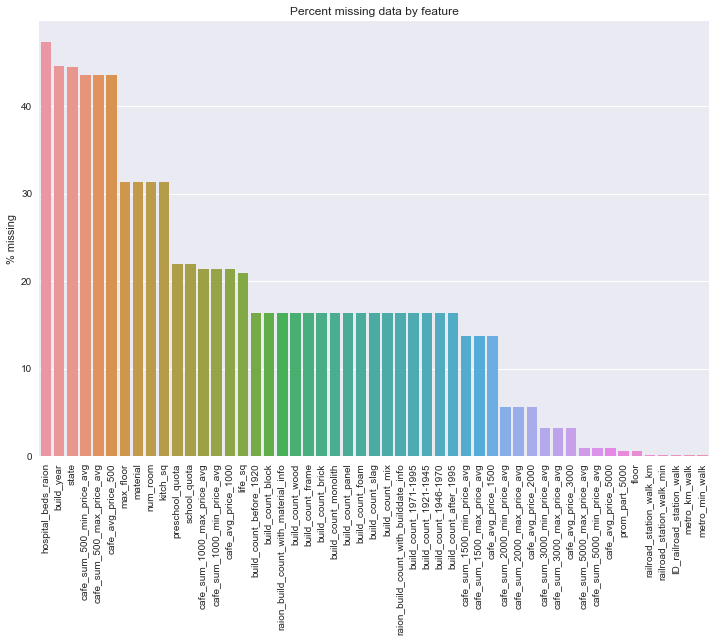

In [5]:
f, ax = plt.subplots(figsize = (12,8))  # no idea what this does
plt.xticks(rotation = '90')
sns.barplot(x=train_na.index, y = train_na)
ax.set(title='Percent missing data by feature', ylabel = '% missing') #ax, wheres f

In [6]:
# data quality issues

In [7]:
#state should be between 3 and 4
train_df.loc[train_df['state'] == 33, 'state'] = 3

In [8]:
# buildyear has 20052009, so ill replace it with finishing year 2009
train_df.loc[train_df['build_year'] == 20052009, 'build_year'] = 2009

In [9]:
# housing internal characteristics

In [10]:
internal_chars = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 
                  'num_room', 'kitch_sq', 'state', 'price_doc']
corrmat = train_df[internal_chars].corr()

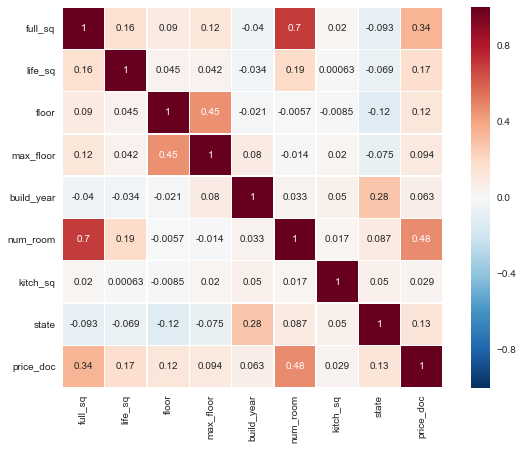

In [11]:
f, ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation = '90')
sns.heatmap(corrmat, square = True, linewidths = 0.5, annot = True)

# high corr between full_Sq and num_rm
# somewhat max_floor and floor
# somewhat state and build_year
# num_room then full_sq most correlated with price

In [12]:
# area of home and number of rooms

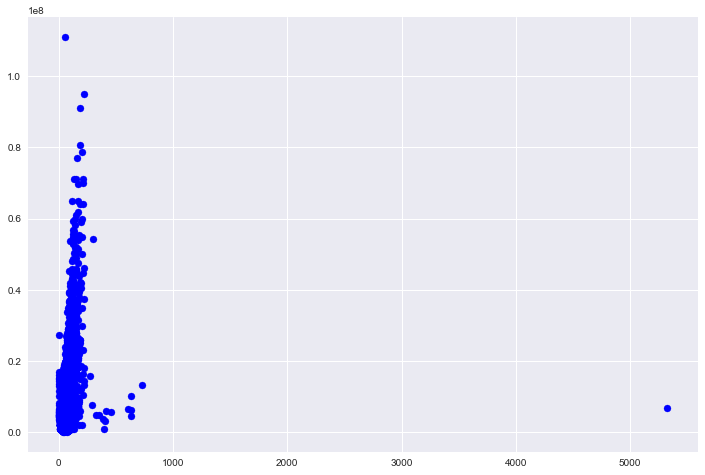

In [13]:
f, ax = plt.subplots(figsize = (12,8))
plt.scatter(x = train_df['full_sq'], y = train_df['price_doc'], c = 'b') 
# what is this c = r business??? # means color = 'red'

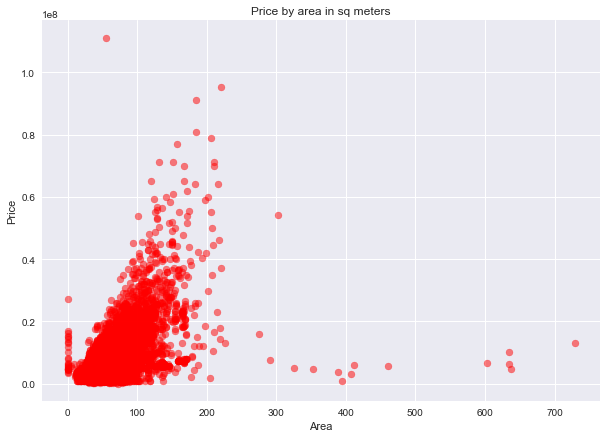

In [14]:
f, ax = plt.subplots(figsize = (10,7))
ind = train_df[train_df['full_sq']> 2000].index #get index of outlier
plt.scatter(x = train_df.drop(ind)['full_sq'], y = train_df.drop(ind)['price_doc'], c = 'r', alpha = 0.5)
ax.set(title = 'Price by area in sq meters', xlabel = 'Area', ylabel = 'Price')

In [15]:
# how many life_sq are bigger than full_sq??
(train_df['life_sq'] > train_df['full_sq']).sum()

37

[<matplotlib.text.Text at 0x13fac1d0>, <matplotlib.text.Text at 0xcbe1470>]

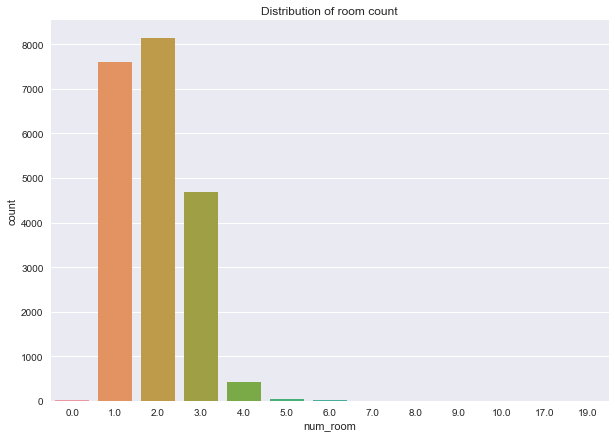

In [16]:
f, ax = plt.subplots(figsize = (10,7))
sns.countplot(x = train_df['num_room'])
ax.set(title = 'Distribution of room count', xlabel = 'num_room')

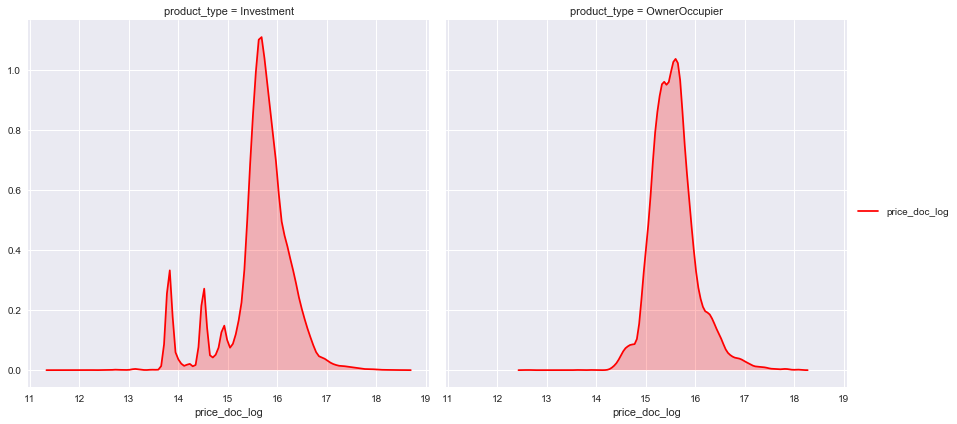

In [17]:
g = sns.FacetGrid(train_df, col = 'product_type', size = 6) # inestment vs. owner, half of  page
g.map(sns.kdeplot, 'price_doc_log', color = 'r', shade = True)
g.add_legend()
ax.set(ylabel = 'density')
#spikes in random places in investment

In [18]:
train_df.groupby('product_type')['price_doc'].median()
# surprisingly base don the graphs, the median price for investment properties is higher

product_type
Investment       6670000
OwnerOccupier    5564090
Name: price_doc, dtype: int64

In [19]:
# build year

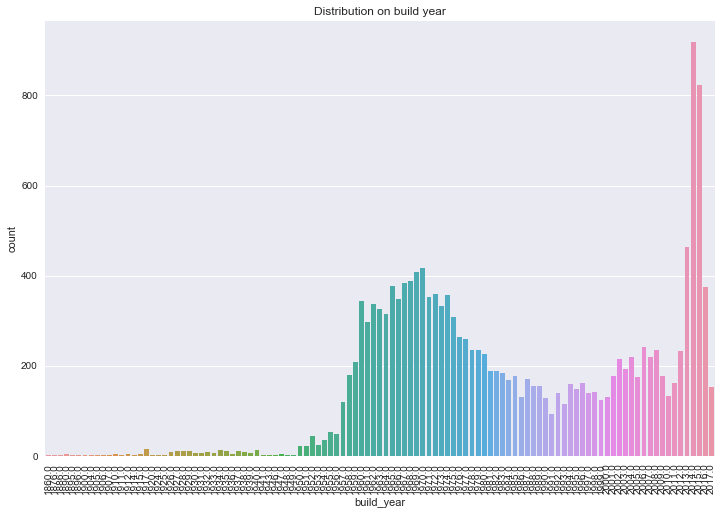

In [20]:
f, ax = plt.subplots(figsize = (12,8))
plt.xticks(rotation = '90')
ind = train_df[(train_df['build_year'] <= 1691) | 
               (train_df['build_year'] >= 2018)].index
by_df = train_df.drop(ind).sort_values(by = ['build_year']) # by_df = build_year
sns.countplot(x = by_df['build_year'])
ax.set(title = 'Distribution on build year')


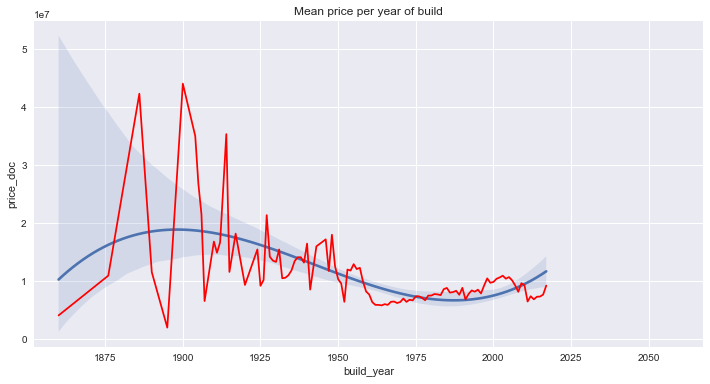

In [21]:
f, ax = plt.subplots(figsize = (12,6))
by_price = by_df.groupby('build_year')[['build_year', 'price_doc']].mean()
sns.regplot(x = 'build_year', 
            y = 'price_doc', 
            data = by_price, 
            scatter = False, 
            order = 3,
            truncate = True)
plt.plot(by_price['build_year'], by_price['price_doc'], color = 'r')
ax.set(title = 'Mean price per year of build')

# time stamp

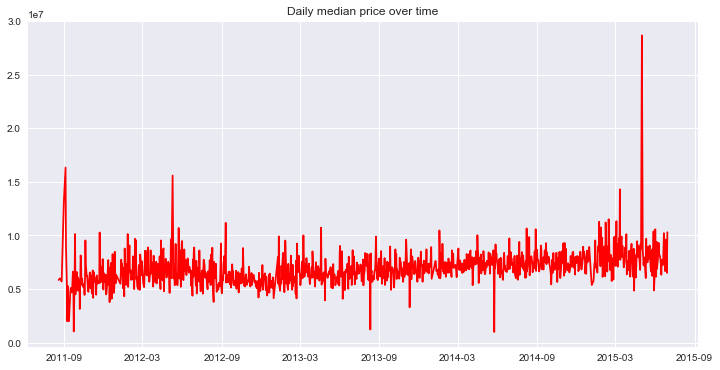

In [22]:
f, ax = plt.subplots(figsize=(12,6))
ts_df = train_df.groupby('timestamp')[['price_doc']].mean()
plt.plot(ts_df.index, ts_df['price_doc'], color = 'r')
ax.set(title = 'Daily median price over time')

[<matplotlib.text.Text at 0x11f1f6d8>, <matplotlib.text.Text at 0x12497be0>]

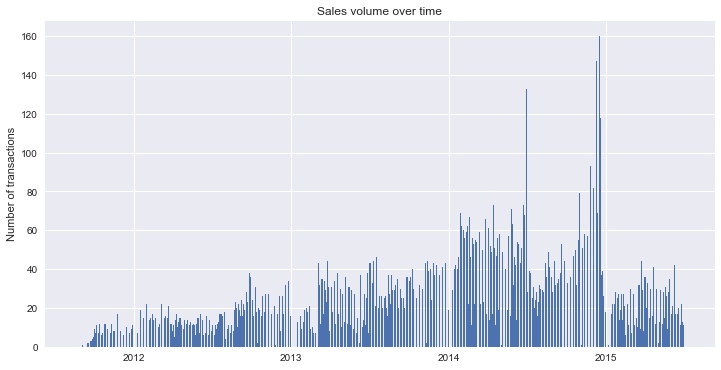

In [23]:
import datetime
import matplotlib.dates as mdates
years = mdates.YearLocator() # every year
yearsFmt = mdates.DateFormatter('%Y')
ts_vc = train_df['timestamp'].value_counts() #timestamp value counts

f, ax = plt.subplots(figsize=(12,6))
plt.bar(left = ts_vc.index, height = ts_vc)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.set(title='Sales volume over time', ylabel='Number of transactions')

# home state material

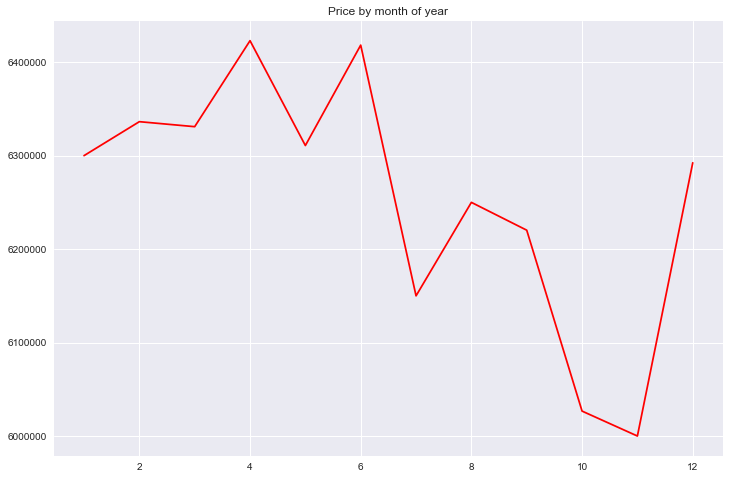

In [24]:
f, ax = plt.subplots(figsize=(12, 8))
ts_df = train_df.groupby(by=[train_df.timestamp.dt.month])[['price_doc']].median()
plt.plot(ts_df.index, ts_df, color='r')
ax.set(title='Price by month of year')

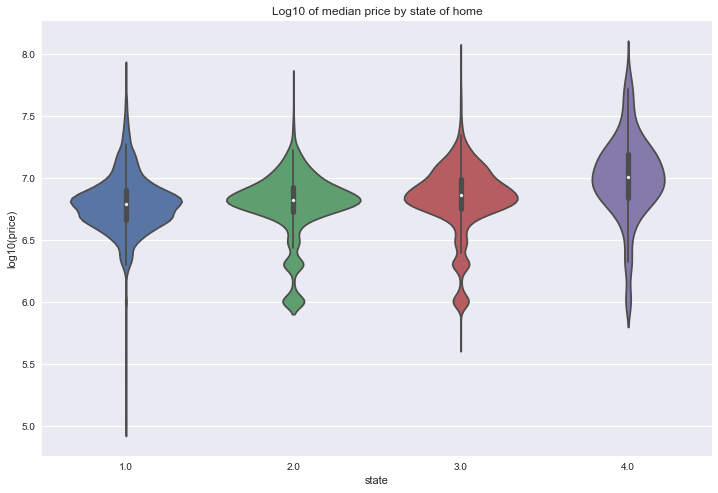

In [25]:
f, ax = plt.subplots(figsize=(12, 8))
ind = train_df[train_df['state'].isnull()].index
train_df['price_doc_log10'] = np.log10(train_df['price_doc'])
sns.violinplot(x="state", y="price_doc_log10", 
               data=train_df.drop(ind), inner="box")

ax.set(title='Log10 of median price by state of home', 
       xlabel='state', ylabel='log10(price)')

# 4 is the most expensive but the other three look pretty evenly distributed

In [26]:
train_df.drop(ind).groupby('state')['price_doc'].mean()

state
1.0    7.315440e+06
2.0    7.060064e+06
3.0    8.078475e+06
4.0    1.334547e+07
Name: price_doc, dtype: float64

In [27]:
# what are the six materials again???  is the most expensive

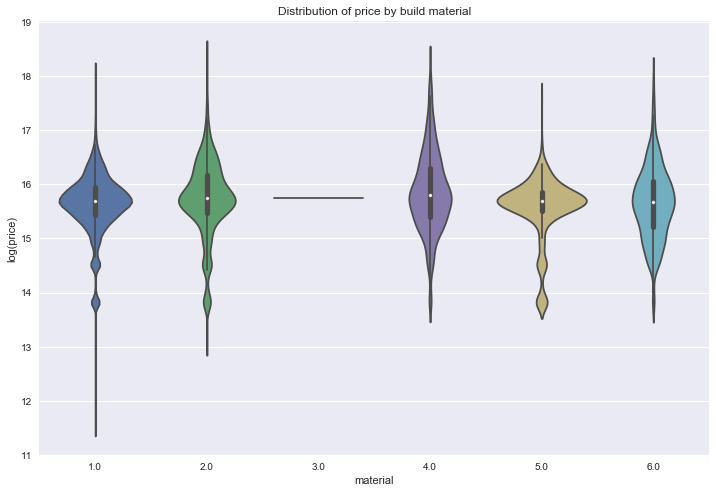

In [28]:
f, ax = plt.subplots(figsize=(12, 8))     #always dropping is null first
ind = train_df[train_df['material'].isnull()].index
sns.violinplot(x="material", y="price_doc_log", 
               data=train_df.drop(ind), 
               inner="box")

# sns.swarmplot(x="state", y="price_doc_log10",
#          data=train_df.dropna(), color="w", alpha=.2);

ax.set(title='Distribution of price by build material', 
       xlabel='material', ylabel='log(price)')

In [29]:
train_df.drop(ind).groupby('material')['price_doc'].median()

material
1.0    6500000.0
2.0    6900000.0
3.0    6931143.0
4.0    7247869.5
5.0    6492000.0
6.0    6362318.0
Name: price_doc, dtype: float64

# floor of home

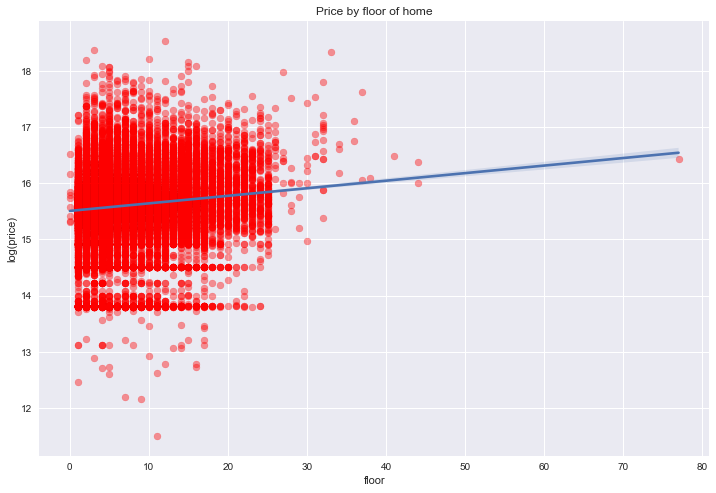

In [30]:
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=train_df['floor'], y=train_df['price_doc_log'], c='r', alpha=0.4)
sns.regplot(x="floor", y="price_doc_log", data=train_df, scatter=False, truncate=True)
ax.set(title='Price by floor of home', xlabel='floor', ylabel='log(price)')

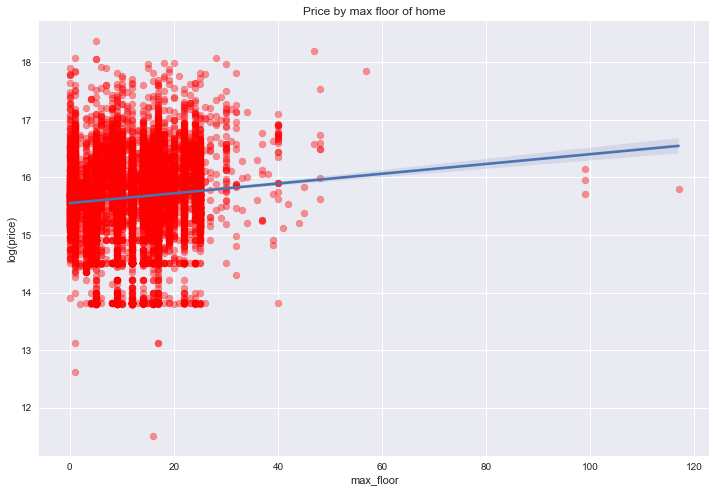

In [31]:
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=train_df['max_floor'], y=train_df['price_doc_log'], c='r', alpha=0.4)
sns.regplot(x="max_floor", y="price_doc_log", data=train_df, scatter=False, truncate=True)
ax.set(title='Price by max floor of home', xlabel='max_floor', ylabel='log(price)')

973

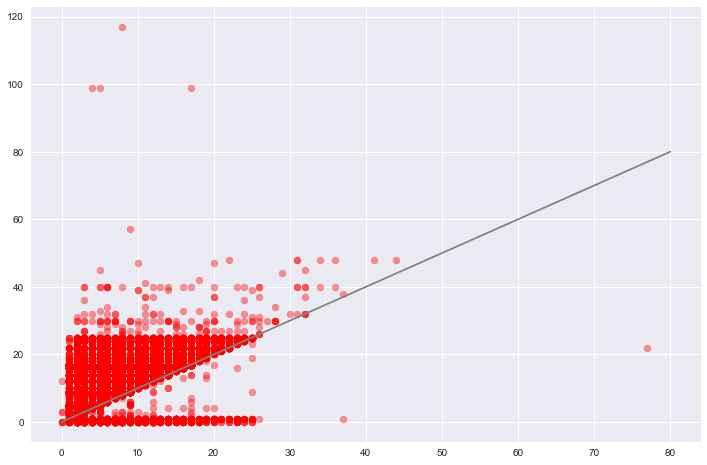

In [32]:
# floor v. maxfloor
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=train_df['floor'], y=train_df['max_floor'], c='r', alpha=0.4)
plt.plot([0, 80], [0, 80], color='.5')
sum(train_df['max_floor'] == 1)

In [33]:
train_df.loc[train_df['max_floor'] < train_df['floor'], 
             ['id', 'floor','max_floor']].head(20)

,id,floor,max_floor
8216,8219,13.0,0.0
8268,8271,3.0,1.0
8499,8502,2.0,0.0
8531,8534,7.0,0.0
8912,8915,5.0,0.0
9161,9164,8.0,3.0
9257,9260,8.0,1.0
9309,9312,5.0,1.0
9388,9391,10.0,1.0
9412,9415,4.0,1.0


# demo charactersis 

In [34]:
demo_vars = ['area_m', 'raion_popul', 'full_all', 'male_f', 'female_f', 'young_all', 'young_female', 
             'work_all', 'work_male', 'work_female', 'price_doc']
corrmat = train_df[demo_vars].corr()   # correlation of demos

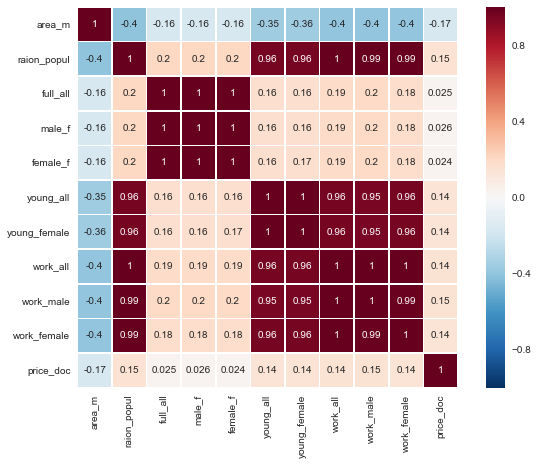

In [35]:
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

In [36]:
train_df['sub_area'].unique().shape[0]  # how many unique subareas (raions) are there?

146L

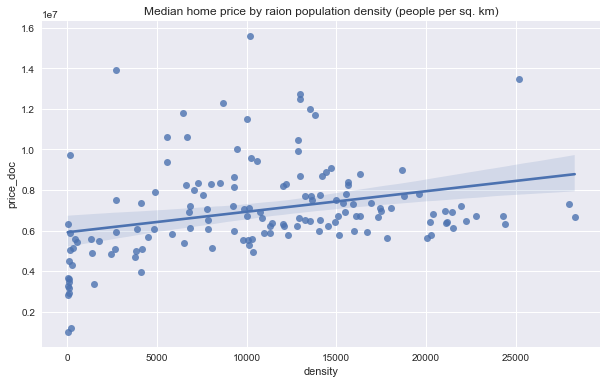

In [37]:
train_df['area_km'] = train_df['area_m'] / 1000000
train_df['density'] = train_df['raion_popul'] / train_df['area_km']
f, ax = plt.subplots(figsize=(10, 6))
sa_price = train_df.groupby('sub_area')[['density', 'price_doc']].median()
sns.regplot(x="density", y="price_doc", data=sa_price, scatter=True, truncate=True)
ax.set(title='Median home price by raion population density (people per sq. km)')

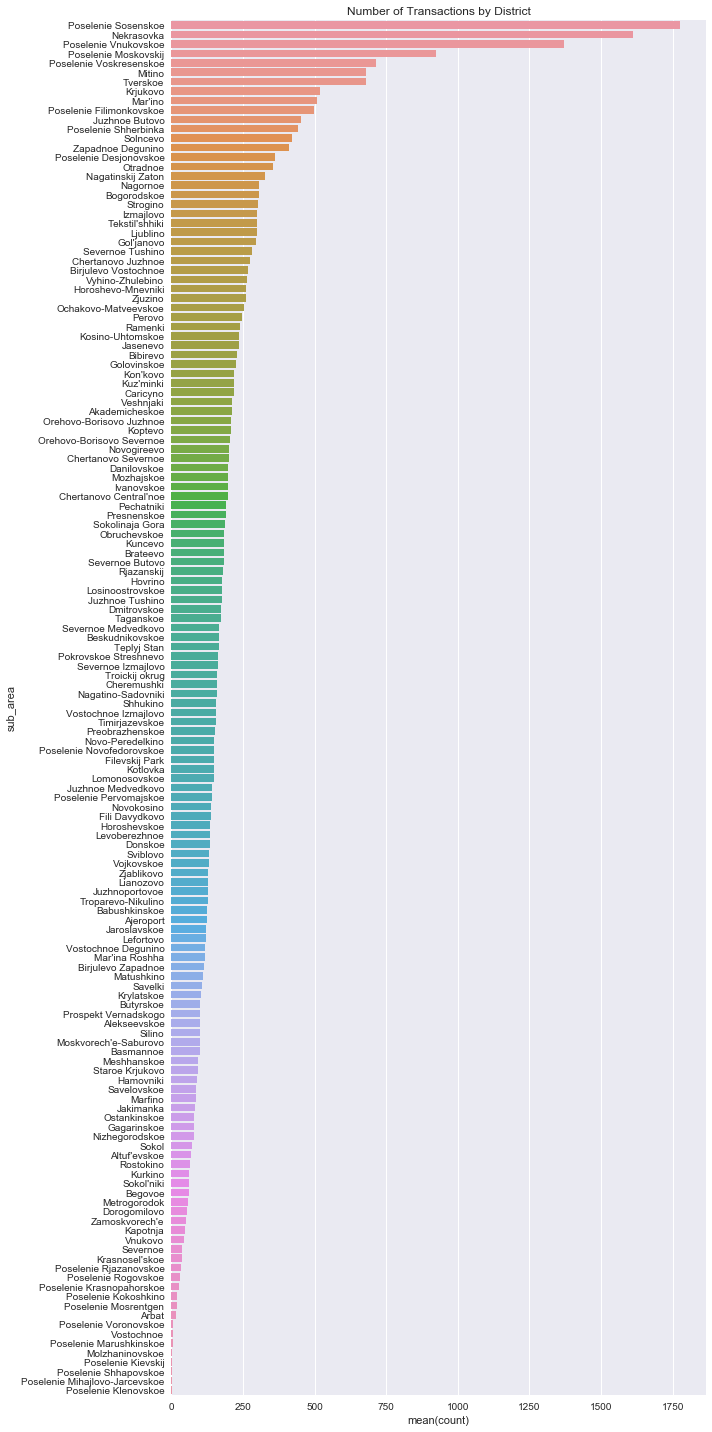

In [38]:
f, ax = plt.subplots(figsize=(10, 20))
sa_vc = train_df['sub_area'].value_counts()
sa_vc = pd.DataFrame({'sub_area':sa_vc.index, 'count': sa_vc.values})
ax = sns.barplot(x="count", y="sub_area", data=sa_vc, orient="h")
ax.set(title='Number of Transactions by District')
f.tight_layout()

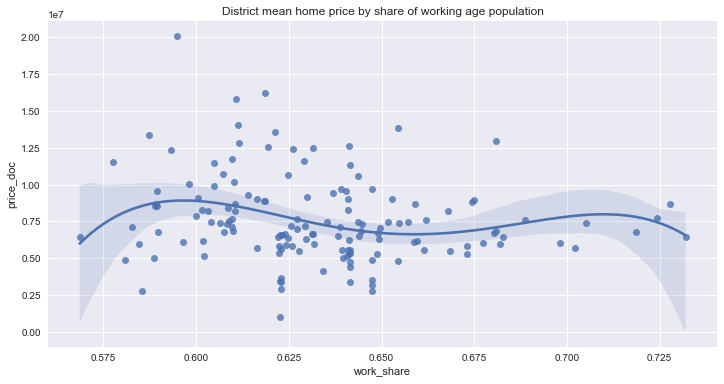

In [39]:
train_df['work_share'] = train_df['work_all'] / train_df['raion_popul']
f, ax = plt.subplots(figsize=(12, 6))
sa_price = train_df.groupby('sub_area')[['work_share', 'price_doc']].mean()
sns.regplot(x="work_share", y="price_doc", data=sa_price, scatter=True, order=4, truncate=True)
ax.set(title='District mean home price by share of working age population')

# schools

In [40]:
school_chars = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 
                'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 
                'university_top_20_raion', 'additional_education_raion', 'additional_education_km', 'university_km', 'price_doc']
corrmat = train_df[school_chars].corr()

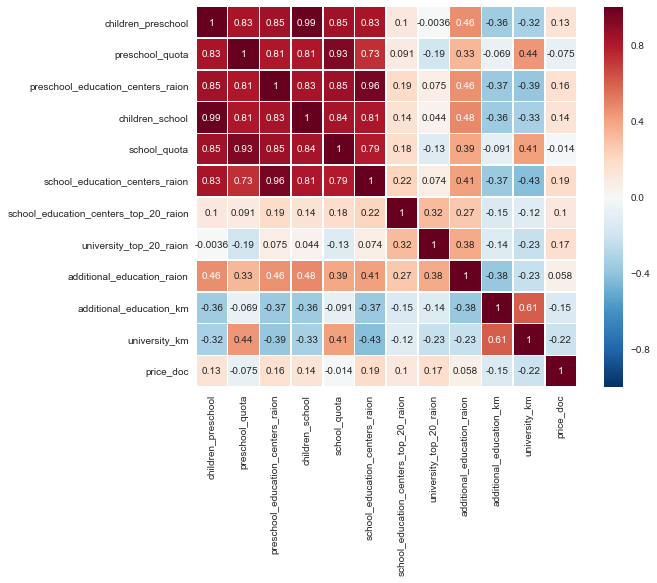

In [41]:
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

In [42]:
train_df['university_top_20_raion'].unique() # confused by this

array([0, 2, 1, 3], dtype=int64)

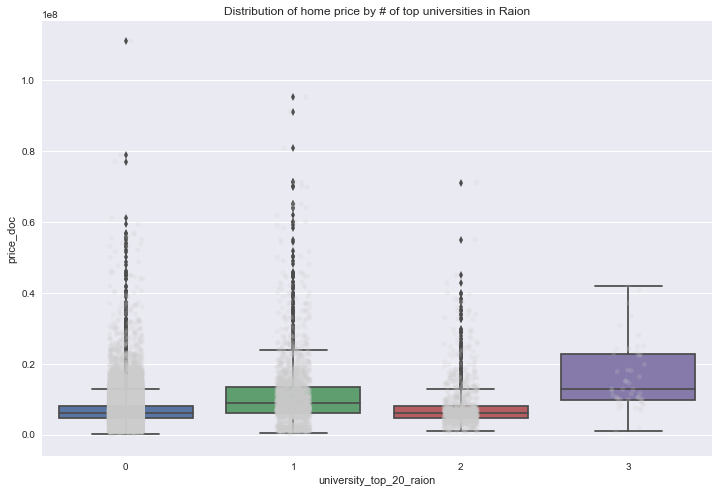

In [43]:
f, ax = plt.subplots(figsize=(12, 8))
sns.stripplot(x="university_top_20_raion", y="price_doc", data=train_df, jitter=True, alpha=.2, color=".8");
sns.boxplot(x="university_top_20_raion", y="price_doc", data=train_df)
ax.set(title='Distribution of home price by # of top universities in Raion', xlabel='university_top_20_raion', 
       ylabel='price_doc')

# cult/rec characterisitics

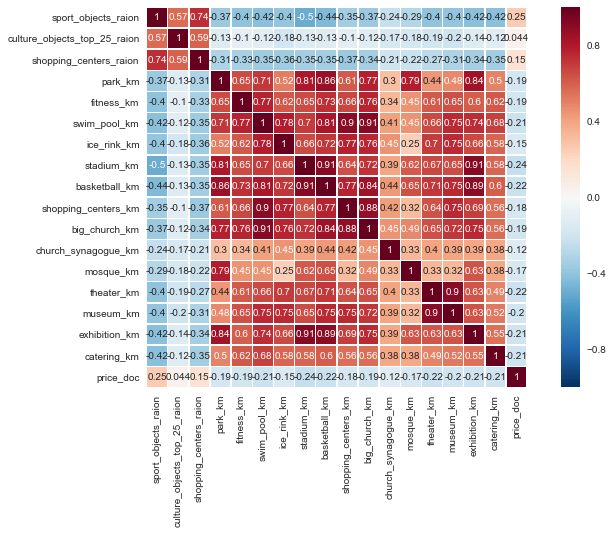

In [44]:
cult_chars = ['sport_objects_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'park_km', 'fitness_km', 
                'swim_pool_km', 'ice_rink_km','stadium_km', 'basketball_km', 'shopping_centers_km', 'big_church_km',
                'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km', 'catering_km', 'price_doc']
corrmat = train_df[cult_chars].corr()

f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

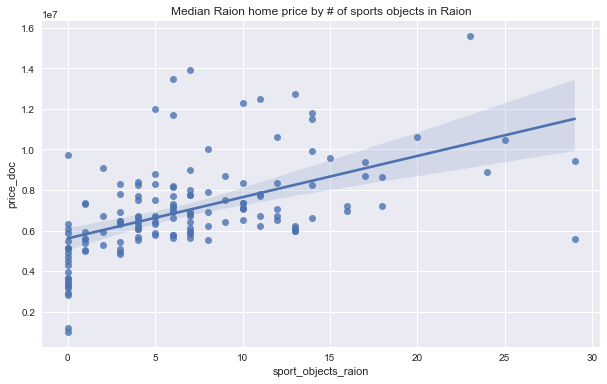

In [45]:
f, ax = plt.subplots(figsize=(10, 6))
so_price = train_df.groupby('sub_area')[['sport_objects_raion', 'price_doc']].median()
sns.regplot(x="sport_objects_raion", y="price_doc", data=so_price, scatter=True, truncate=True)
ax.set(title='Median Raion home price by # of sports objects in Raion')


# more rec centers more money

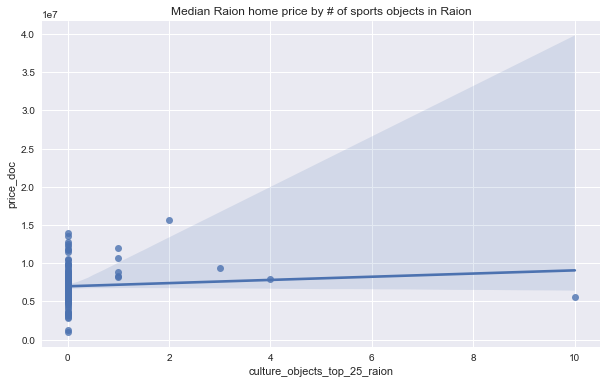

In [46]:
f, ax = plt.subplots(figsize=(10, 6))
co_price = train_df.groupby('sub_area')[['culture_objects_top_25_raion', 'price_doc']].median()
sns.regplot(x="culture_objects_top_25_raion", y="price_doc", data=co_price, scatter=True, truncate=True)
ax.set(title='Median Raion home price by # of sports objects in Raion')

# not helpful

In [47]:
train_df.groupby('culture_objects_top_25')['price_doc'].median()


# significant increase if culture objects are top 25

culture_objects_top_25
no     6200000
yes    7400000
Name: price_doc, dtype: int64

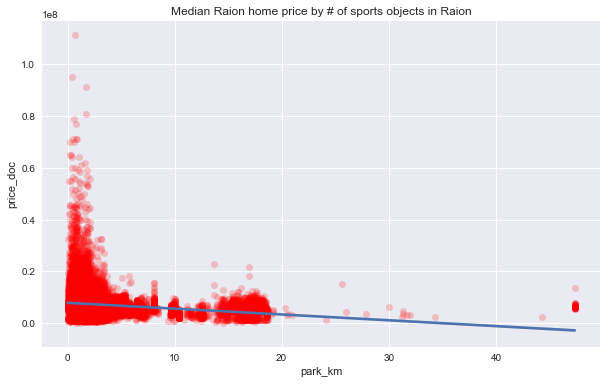

In [48]:
f, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="park_km", y="price_doc", data=train_df, scatter=True, truncate=True, scatter_kws={'color': 'r', 'alpha': .2})
ax.set(title='Median Raion home price by # of sports objects in Raion')

# farther away = less expensive and most expensive are all less than 5 


# infrastructure features

In [49]:
inf_features = ['nuclear_reactor_km', 'thermal_power_plant_km', 'power_transmission_line_km', 'incineration_km',
                'water_treatment_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 
                'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km', 
                'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km',
                'kremlin_km', 'price_doc']
corrmat = train_df[inf_features].corr()

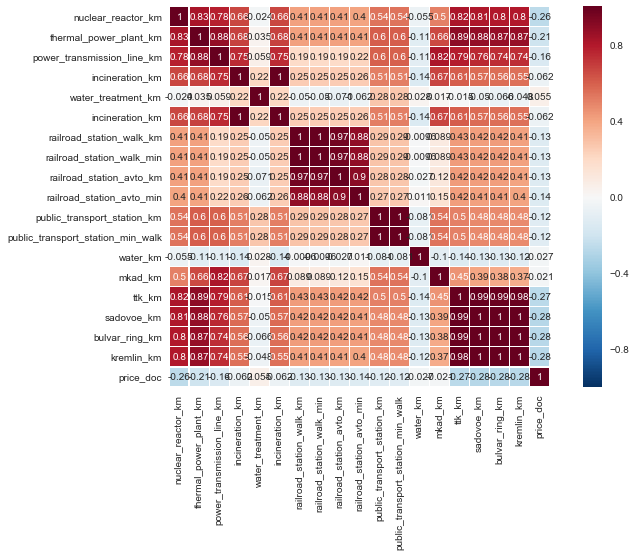

In [50]:
f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)


# for some reason all negative with price and I dont understand why
# oh because higher km means further away which is bad! 
# people want to live in city center or next to kremlin!!!



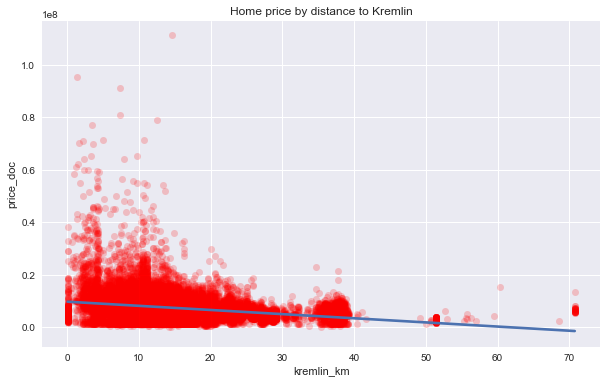

In [51]:
f, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="kremlin_km", y="price_doc", data=train_df, scatter=True, truncate=True, scatter_kws={'color': 'r', 'alpha': .2})
ax.set(title='Home price by distance to Kremlin')

# variable importance

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
X_train = train_df.drop(labels=['timestamp', 'id', 'incineration_raion'], axis=1).dropna()
y_train = X_train['price_doc']
X_train.drop('price_doc', axis=1, inplace=True)
for f in X_train.columns:
    if X_train[f].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(X_train[f])
        X_train[f] = lbl.transform(X_train[f])
rf = RandomForestRegressor(random_state=0)
rf = rf.fit(X_train, y_train)

In [101]:
# train_df.columns.values

In [54]:
fi = list(zip(X_train.columns, rf.feature_importances_))
print('## rf variable importance')
for i in fi[:20]:
    print('## %-40s%s' % (i)) 
    
    
    
    # not really sure what this means??????????????

## rf variable importance
## full_sq                                 5.87095874357e-07
## life_sq                                 9.04347628546e-08
## floor                                   1.20590421994e-08
## max_floor                               1.20794309636e-07
## material                                7.64088471084e-08
## build_year                              5.56703735125e-05
## num_room                                1.18520322785e-06
## kitch_sq                                5.87408823398e-08
## state                                   1.4491456575e-07
## product_type                            2.21240486991e-08
## sub_area                                5.77751434754e-09
## area_m                                  6.22619361625e-07
## raion_popul                             2.39214582143e-08
## green_zone_part                         2.57185801048e-07
## indust_part                             5.86329500469e-08
## children_preschool                      4.39636702546e-08

# train vs test data

In [55]:
test_df = pd.read_csv("test.csv", parse_dates=['timestamp'])
test_na = (test_df.isnull().sum() / len(test_df)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)

[<matplotlib.text.Text at 0x22064f28>, <matplotlib.text.Text at 0x23285128>]

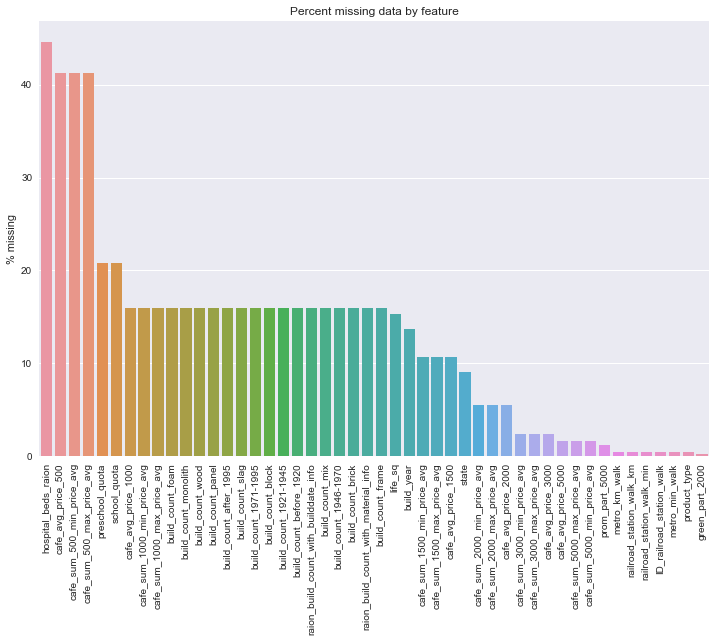

In [56]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=test_na.index, y=test_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')

In [57]:
all_data = pd.concat([train_df.drop('price_doc', axis=1), test_df])
all_data['dataset'] = ''
l = len(train_df)
all_data.iloc[:l]['dataset'] = 'train'
all_data.iloc[l:]['dataset'] = 'test'
train_dataset = all_data['dataset'] == 'train'

[<matplotlib.text.Text at 0x2b957588>, <matplotlib.text.Text at 0x22d8f588>]

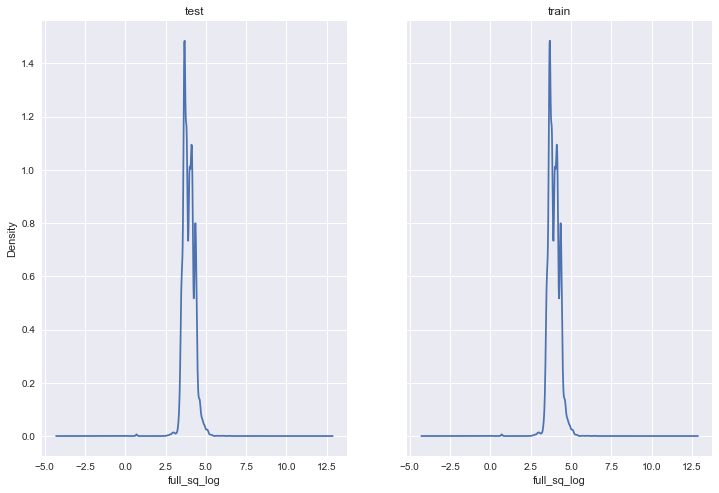

In [58]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
all_data['full_sq_log'] = np.log1p(all_data['full_sq'])
all_data.drop(train_dataset)["full_sq_log"].plot.kde(ax=ax[0])
all_data.drop(~train_dataset)["full_sq_log"].plot.kde(ax=ax[1])
ax[0].set(title='test', xlabel='full_sq_log')
ax[1].set(title='train', xlabel='full_sq_log')

# look similar for full sq comparisons

[<matplotlib.text.Text at 0x2b283588>, <matplotlib.text.Text at 0x2b2a5588>]

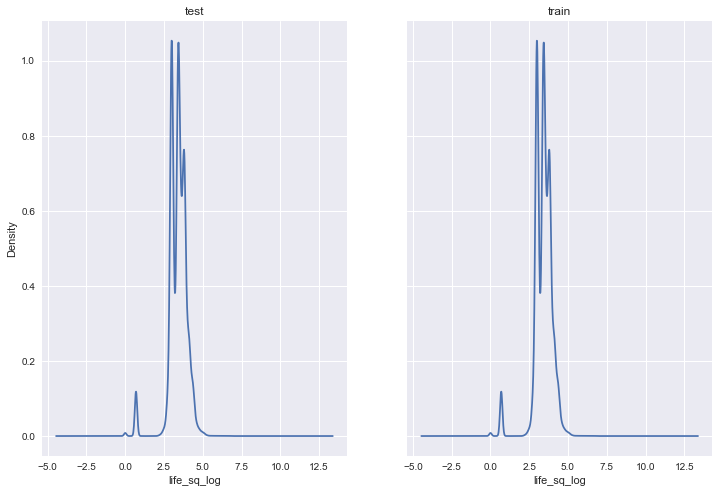

In [59]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
all_data['life_sq_log'] = np.log1p(all_data['life_sq'])
all_data.drop(train_dataset)["life_sq_log"].plot.kde(ax=ax[0])
all_data.drop(~train_dataset)["life_sq_log"].plot.kde(ax=ax[1])
ax[0].set(title='test', xlabel='life_sq_log')
ax[1].set(title='train', xlabel='life_sq_log')

[<matplotlib.text.Text at 0x2dfcb240>, <matplotlib.text.Text at 0x22dedac8>]

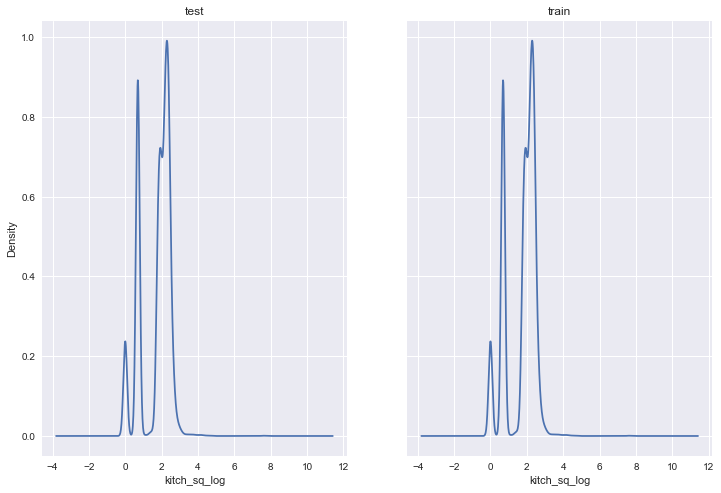

In [60]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
all_data['kitch_sq_log'] = np.log1p(all_data['kitch_sq'])
all_data.drop(train_dataset)["kitch_sq_log"].plot.kde(ax=ax[0])
all_data.drop(~train_dataset)["kitch_sq_log"].plot.kde(ax=ax[1])
ax[0].set(title='test', xlabel='kitch_sq_log')
ax[1].set(title='train', xlabel='kitch_sq_log')

[<matplotlib.text.Text at 0x25d929b0>, <matplotlib.text.Text at 0x2b97bc18>]

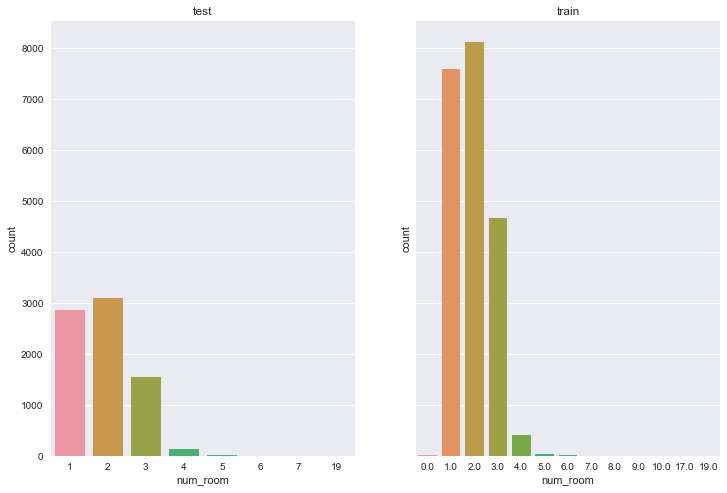

In [61]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
sns.countplot(x=test_df['num_room'], ax=ax[0])
sns.countplot(x=train_df['num_room'], ax=ax[1])
ax[0].set(title='test', xlabel='num_room')
ax[1].set(title='train', xlabel='num_room')

[<matplotlib.text.Text at 0x2ab8c828>, <matplotlib.text.Text at 0x2abf4e10>]

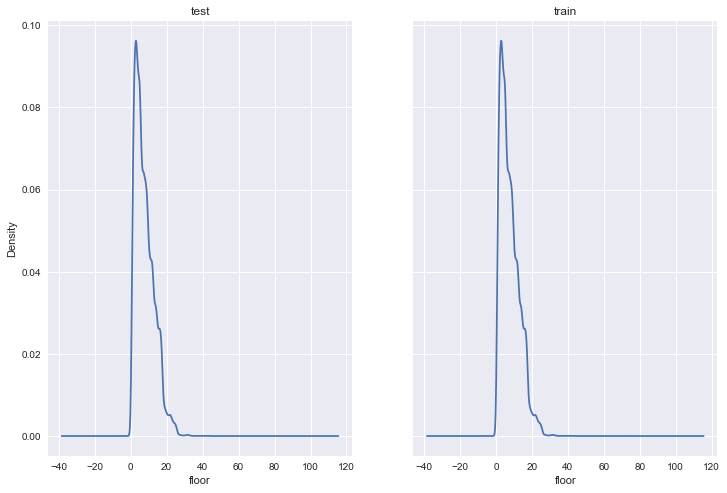

In [62]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
all_data.drop(train_dataset)["floor"].plot.kde(ax=ax[0])
all_data.drop(~train_dataset)["floor"].plot.kde(ax=ax[1])
ax[0].set(title='test', xlabel='floor')
ax[1].set(title='train', xlabel='floor')

[<matplotlib.text.Text at 0x2acca358>, <matplotlib.text.Text at 0x261bfa90>]

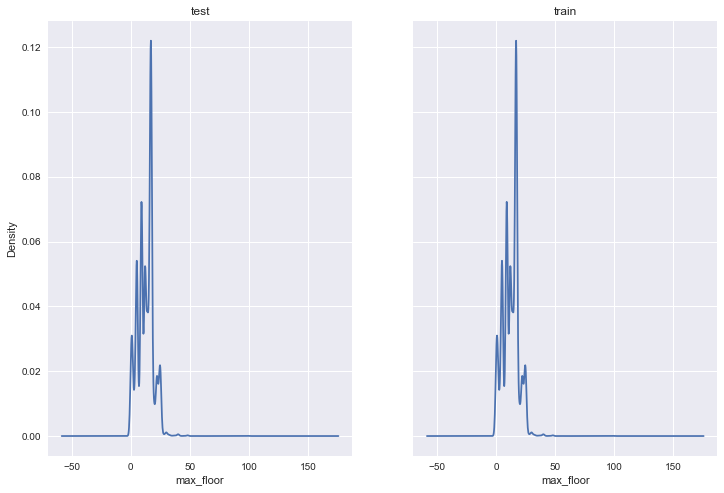

In [63]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
all_data.drop(train_dataset)["max_floor"].plot.kde(ax=ax[0])
all_data.drop(~train_dataset)["max_floor"].plot.kde(ax=ax[1])
ax[0].set(title='test', xlabel='max_floor')
ax[1].set(title='train', xlabel='max_floor')

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
ax[0].scatter(x=test_df['floor'], y=test_df['max_floor'], c='r', alpha=0.4)
ax[0].plot([0, 80], [0, 80], color='.5')
ax[1].scatter(x=train_df['floor'], y=train_df['max_floor'], c='r', alpha=0.4)
ax[1].plot([0, 80], [0, 80], color='.5')
ax[0].set(title='test', xlabel='floor', ylabel='max_floor')
ax[1].set(title='train', xlabel='floor', ylabel='max_floor')

[<matplotlib.text.Text at 0x2ae6fa58>, <matplotlib.text.Text at 0x2afcc668>]

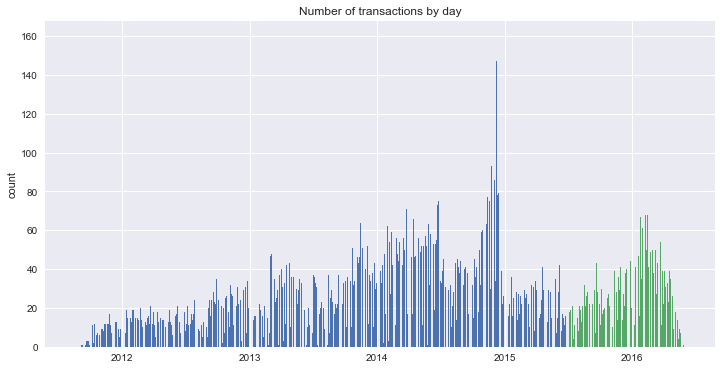

In [65]:
years = mdates.YearLocator()   # every year
yearsFmt = mdates.DateFormatter('%Y')
ts_vc_train = train_df['timestamp'].value_counts()
ts_vc_test = test_df['timestamp'].value_counts()
f, ax = plt.subplots(figsize=(12, 6))
plt.bar(left=ts_vc_train.index, height=ts_vc_train)
plt.bar(left=ts_vc_test.index, height=ts_vc_test)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.set(title='Number of transactions by day', ylabel='count')

[<matplotlib.text.Text at 0x2eaa17b8>, <matplotlib.text.Text at 0x2920a358>]

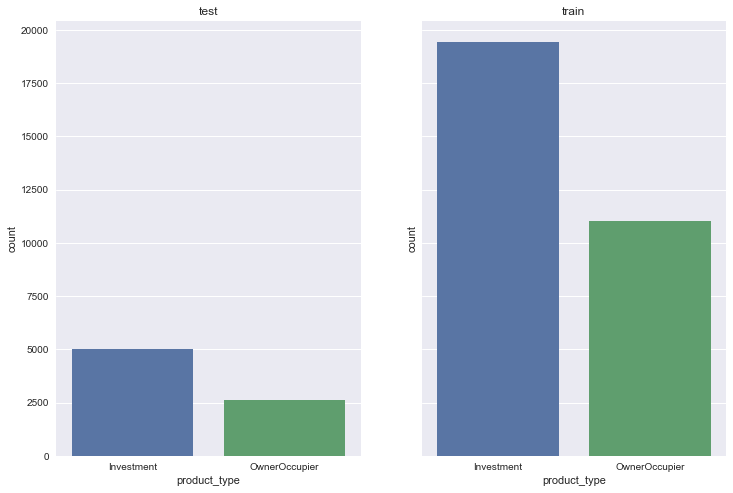

In [66]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
sns.countplot(x=test_df['product_type'], ax=ax[0])
sns.countplot(x=train_df['product_type'], ax=ax[1])
ax[0].set(title='test', xlabel='product_type')
ax[1].set(title='train', xlabel='product_type')

[<matplotlib.text.Text at 0x2f813b38>, <matplotlib.text.Text at 0x2fa729e8>]

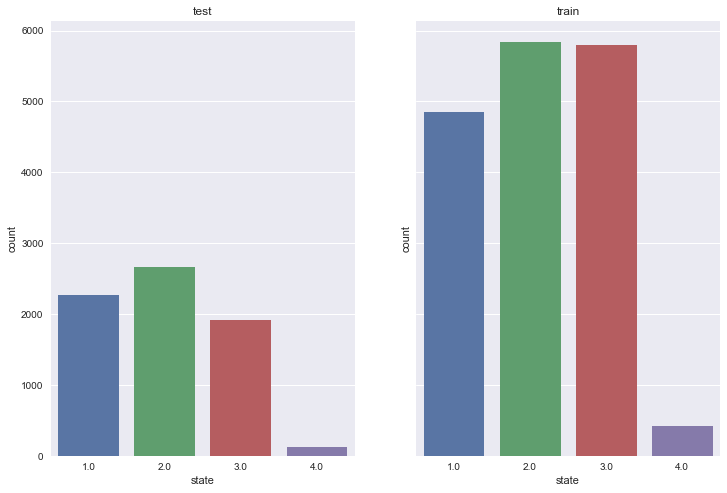

In [67]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
sns.countplot(x=test_df['state'], ax=ax[0])
sns.countplot(x=train_df['state'], ax=ax[1])
ax[0].set(title='test', xlabel='state')
ax[1].set(title='train', xlabel='state')


# first big diff I see, in the test set, there
# are a lot less state 3 than in the training set

[<matplotlib.text.Text at 0x303cbda0>, <matplotlib.text.Text at 0x304309e8>]

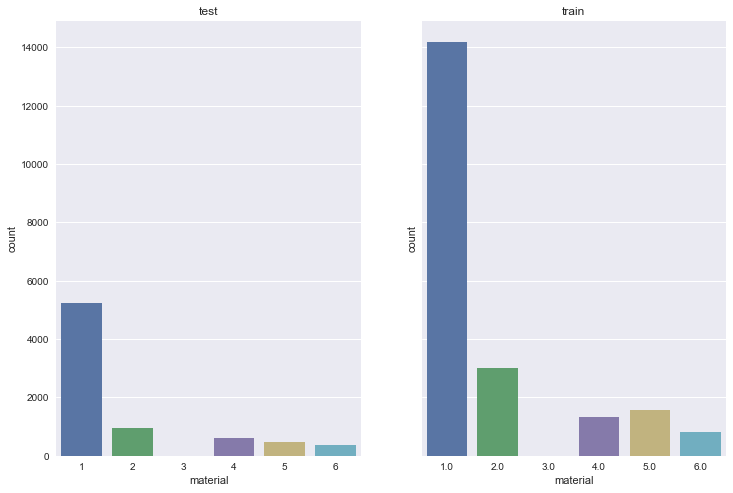

In [68]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
sns.countplot(x=test_df['material'], ax=ax[0])
sns.countplot(x=train_df['material'], ax=ax[1])
ax[0].set(title='test', xlabel='material')
ax[1].set(title='train', xlabel='material')


# less of material 5

# My own stuff

In [85]:
#train_df.columns.values

In [70]:
green = ['green_part_500', 'green_part_1000','green_part_1500',
         'green_part_2000','green_part_3000','green_part_5000',
        'price_doc', 'price_doc_log', 'price_doc_log10']

prom = ['prom_part_500','prom_part_1000','prom_part_1500',
        'prom_part_2000','prom_part_3000','prom_part_5000',
       'price_doc', 'price_doc_log', 'price_doc_log10']
        
office = ['office_count_500','office_sqm_500','office_count_1000',
          'office_sqm_1000','office_count_1500', 'office_sqm_1500',
          'office_count_2000','office_sqm_2000','office_count_3000',
          'office_sqm_3000','office_count_5000','office_sqm_5000',
         'price_doc', 'price_doc_log', 'price_doc_log10']
          
# shopping malls
trc = ['trc_count_1000', 'trc_count_1500', 'trc_count_2000', 'trc_count_3000', 
       'trc_count_500', 'trc_count_5000', 'trc_sqm_1000', 'trc_sqm_1500',
       'trc_sqm_2000', 'trc_sqm_3000', 'trc_sqm_500', 'trc_sqm_5000', 'trc_count_1000', 'trc_sqm_1000',
      'price_doc', 'price_doc_log', 'price_doc_log10']
       
       
church = ['big_church_count_500', 'church_count_500', 'mosque_count_500',
         'big_church_count_1000', 'church_count_1000', 'mosque_count_1000',
         'big_church_count_1500', 'church_count_1500', 'mosque_count_1500',
         'big_church_count_3000', 'church_count_3000', 'mosque_count_3000',
         'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
         'big_church_count_2000', 'church_count_2000', 'mosque_count_2000',
         'price_doc', 'price_doc_log', 'price_doc_log10']

        
sport = ['sport_count_500','sport_count_1000','sport_count_2000', 
         'sport_count_5000','sport_count_1500','sport_count_3000',
        'price_doc', 'price_doc_log', 'price_doc_log10']

leisure = ['leisure_count_500','leisure_count_3000','leisure_count_1000',
           'leisure_count_1500','leisure_count_2000','leisure_count_5000',
          'price_doc', 'price_doc_log', 'price_doc_log10']

market = ['market_count_500','market_count_5000', 'market_count_2000',
          'market_count_1000','market_count_1500','market_count_3000',
         'price_doc', 'price_doc_log', 'price_doc_log10']    


cafe_price = ['cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
              'cafe_avg_price_500', 'cafe_sum_1000_min_price_avg','cafe_sum_1000_max_price_avg', 
              'cafe_avg_price_1000', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 
              'cafe_avg_price_1500', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 
              'cafe_avg_price_2000', 'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg',
              'cafe_avg_price_3000',  'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg',
              'cafe_avg_price_5000','cafe_count_5000_price_high', 
              'price_doc', 'price_doc_log', 'price_doc_log10']      

    
cafe_count = ['cafe_count_500', 'cafe_count_500_na_price',
       'cafe_count_500_price_500', 'cafe_count_500_price_1000',
       'cafe_count_500_price_1500', 'cafe_count_500_price_2500',
       'cafe_count_500_price_4000', 'cafe_count_500_price_high', 'cafe_count_1000', 
       'cafe_count_1000_na_price', 'cafe_count_1000_price_500',
       'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500',
       'cafe_count_1000_price_2500', 'cafe_count_1000_price_4000',
       'cafe_count_1000_price_high','cafe_count_1500',
       'cafe_count_1500_na_price',
       'cafe_count_1500_price_500', 'cafe_count_1500_price_1000',
       'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500',
       'cafe_count_1500_price_4000', 'cafe_count_1500_price_high', 'cafe_count_2000', 
       'cafe_count_2000_na_price', 'cafe_count_2000_price_500',
       'cafe_count_2000_price_1000', 'cafe_count_2000_price_1500',
       'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000',
       'cafe_count_2000_price_high', 'cafe_count_3000', 'cafe_count_3000_na_price',
       'cafe_count_3000_price_500', 'cafe_count_3000_price_1000',
       'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500',
       'cafe_count_3000_price_4000', 'cafe_count_3000_price_high','cafe_count_5000',
       'cafe_count_5000_na_price', 'cafe_count_5000_price_500',
       'cafe_count_5000_price_1000', 'cafe_count_5000_price_1500',
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'price_doc', 'price_doc_log', 'price_doc_log10'] 
        
price = ['price_doc', 'price_doc_log', 'price_doc_log10'] 

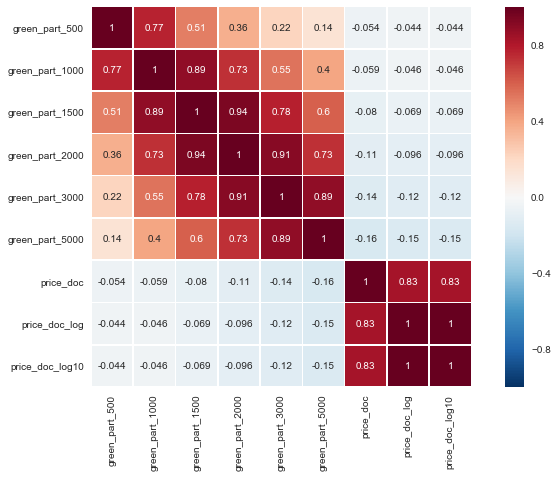

In [71]:
corrmat = train_df[green].corr()

f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

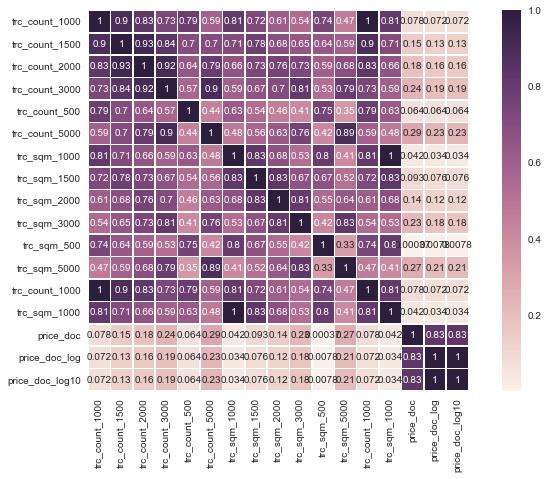

In [72]:
corrmat = train_df[trc].corr()

f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

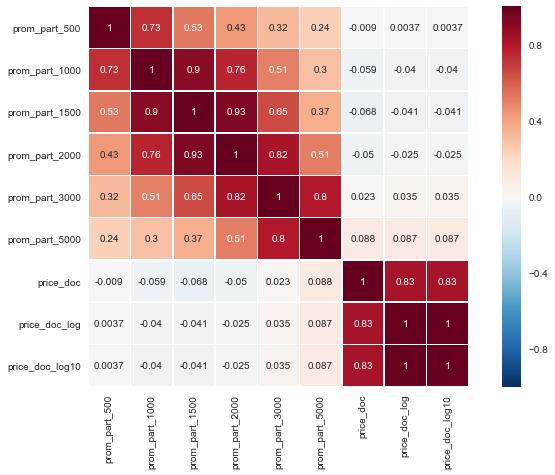

In [73]:
corrmat = train_df[prom].corr()

f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

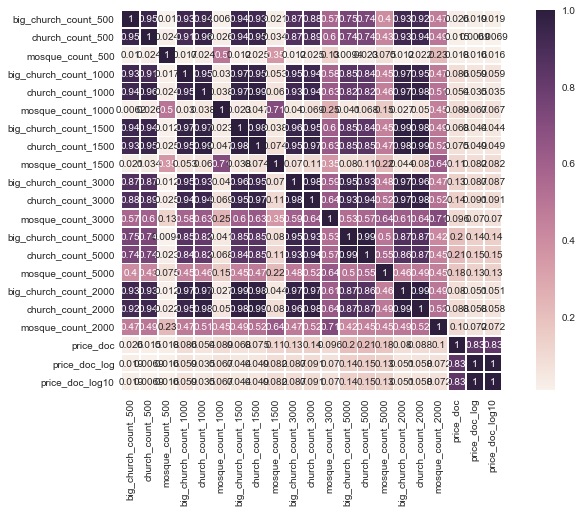

In [74]:
corrmat = train_df[church].corr()

f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

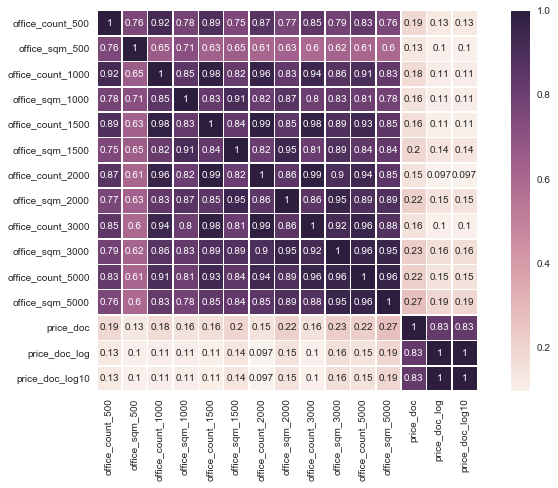

In [75]:
corrmat = train_df[office].corr()

f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

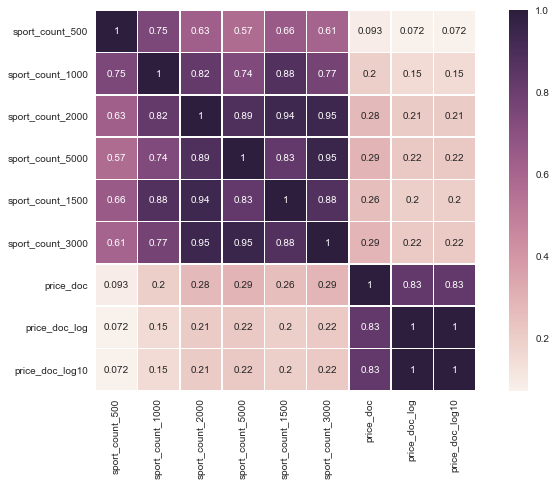

In [76]:
corrmat = train_df[sport].corr()

f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

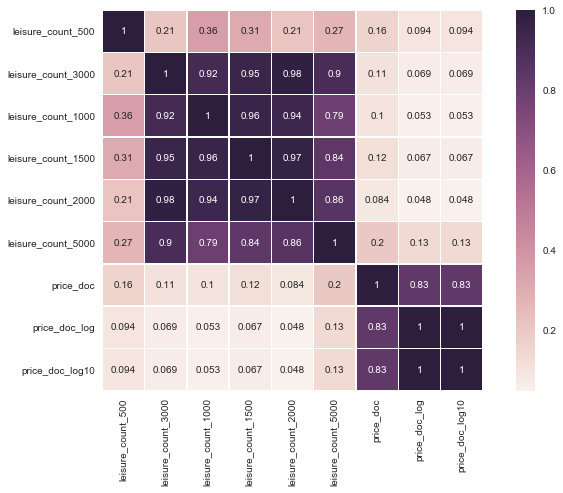

In [77]:
corrmat = train_df[leisure].corr()

f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

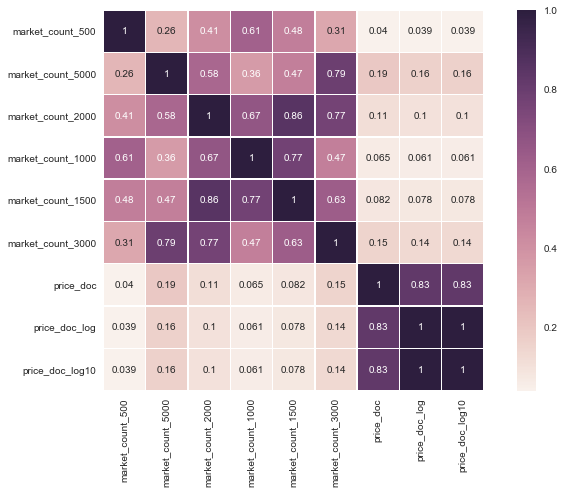

In [78]:
corrmat = train_df[market].corr()

f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

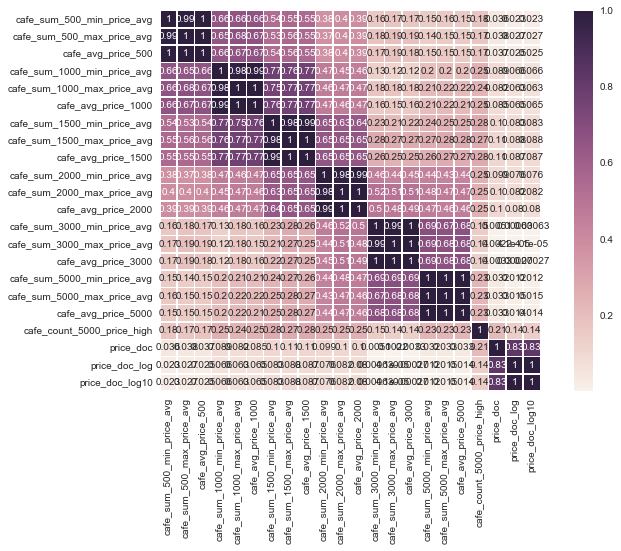

In [79]:
corrmat = train_df[cafe_price].corr()

f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

In [99]:
important_features = ['id', 'full_sq', 'life_sq', 'floor',
                      'max_floor', 'material', 'build_year',
                      'num_room', 'kitch_sq', 'state', 'area_m',
                      'price_doc', 'gdp_quart', 'deposits_value', 
                      'deposits_growth', 'deposits_rate', 'mortgage_value',
                      'mortgage_growth', 'mortgage_rate', 'salary',
                      'unemployment', 'employment',  'oil_urals',
                      'stadium_km', 'floor', 'max_floor', 'metro_min_avto',
                      'build_year', 'cafe_count_5000_price_high', 'num_room',
                      'radiation_km',
                      'green_zone_km', 'industrial_km', 'indust_part',
                      'cpi', 'cafe_count_5000', 'cafe_count_1500_price_high',
                      'cafe_count_5000_price_500', 'cafe_count_2000_price_2500',
                      'kitch_sq', 'max_floor', 'trc_sqm_5000', 
                      'office_sqm_1000', 'trc_sqm_1500', 'office_sqm_500', 'cpi', 
                      'office_sqm_5000', 'ID_railroad_terminal', 'office_sqm_1500', 
                      'ekder_male', 'raion_popul', 'price_doc']

important_features = list(set(important_features))
# 'month', 'day',
#                       'year', 'month_year', 'week_year', 'oil_chemistry_raion_yes',

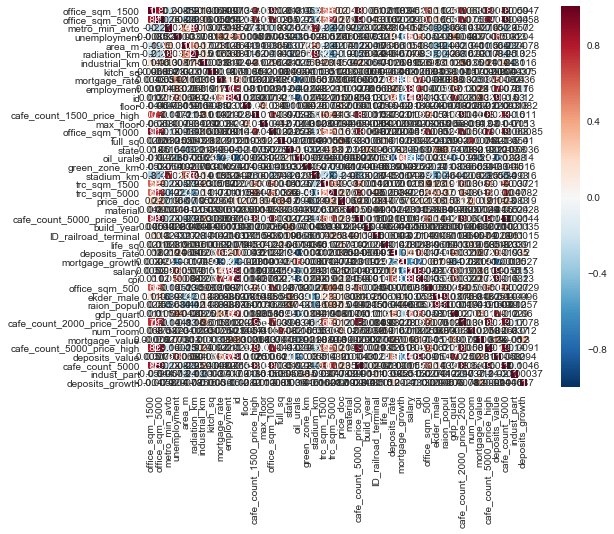

In [103]:
corrmat = train[important_features].corr()

f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)
# print(corrmat['price_doc'])

# 
# 
# 
# 
# 




# Linear Regression

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [81]:
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

In [82]:
train = pd.read_csv('train.csv', parse_dates=['timestamp'])
test = pd.read_csv('test.csv', parse_dates = ['timestamp'])
macro = pd.read_csv('macro.csv', parse_dates = ['timestamp'])

train['price_doc_log'] = np.log1p(train['price_doc'])
test['price_doc_log'] = np.log1p(train['price_doc'])


In [83]:
train.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [84]:
all_data = pd.concat((train.loc))

NotImplementedError: ix is not iterable